In [1]:
!pip install spotipy


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config

Cleaning Songs dataset 

In [5]:
song_arc_df= pd.read_csv(r'C:\Users\samya\PyCharmProject\song-recommendations-\Dataset\audio_features_dataset_curated.csv')

In [6]:
song_arc_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [7]:
#checking Null value 
song_arc_df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [9]:
#shape of dataframe
song_arc_df.shape

(43000, 19)

In [10]:
song_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          43000 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        43000 non-null  int64  
 5   duration_ms       43000 non-null  int64  
 6   explicit          43000 non-null  bool   
 7   danceability      43000 non-null  float64
 8   energy            43000 non-null  float64
 9   key               43000 non-null  int64  
 10  loudness          43000 non-null  float64
 11  mode              43000 non-null  int64  
 12  speechiness       43000 non-null  float64
 13  acousticness      43000 non-null  float64
 14  instrumentalness  43000 non-null  float64
 15  liveness          43000 non-null  float64
 16  valence           43000 non-null  float6

In [11]:
song_arc_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [12]:
song_arc_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [13]:
song_arc_df.drop(columns=['explicit','mode','key','time_signature','popularity'], inplace=True)

In [14]:
song_arc_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'duration_ms',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [15]:
song_arc_df

,track_id,artists,album_name,track_name,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


In [16]:
song_arc_df.shape

(43000, 14)

In [18]:
song_arc_df.dropna(inplace=True)

In [19]:
song_arc_df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
duration_ms         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [20]:
song_arc_df.shape

(42999, 14)

In [21]:
song_arc_df.describe()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4.299900e+04,42999.000000,42999.000000,42999.000000,42999.000000,42999.000000,42999.000000,42999.000000,42999.000000,42999.000000
mean,2.308657e+05,0.575397,0.632785,-7.915887,0.071419,0.299393,0.118135,0.196262,0.482020,121.216288
std,9.284903e+04,0.166244,0.241945,4.712461,0.072020,0.322862,0.276820,0.172005,0.251098,29.360828
min,1.745300e+04,0.000000,0.000020,-43.043000,0.000000,0.000001,0.000000,0.009860,0.000000,0.000000
25%,1.811060e+05,0.465000,0.475000,-9.399500,0.034300,0.022000,0.000000,0.096200,0.275000,97.937000
50%,2.168070e+05,0.587000,0.674000,-6.749000,0.045500,0.155000,0.000016,0.125000,0.472000,121.390000
75%,2.613595e+05,0.700000,0.832000,-4.942000,0.073700,0.546000,0.006945,0.242000,0.684000,139.950000
max,3.601693e+06,0.975000,1.000000,1.821000,0.924000,0.996000,1.000000,0.994000,0.995000,243.372000


In [23]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f4/5a/ba91b8c57aa37dbd80d5ff958576a9a8c14317b04b671ae7f0d09b00993a/scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.8.0 from https://files.pythonhosted.org/packages/ab/a7/0ddaf514ce8a8714f6ed243a2b391b41dbb65251affe21ee3077ec45ea9a/scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 667.8 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/7d/4f/1195bbac8e0c2acc5f740661631d8d750dc38d4a32b23ee5df3cde6f4e0d/joblib-1.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef645


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
def ms_to_mmss(ms):
    min= ms// 60000
    sec= (ms% 60000)//1000
    return f"{min:02}:{sec:02}"
song_arc_df['duration_mmss'] = song_arc_df['duration_ms'].apply(ms_to_mmss)

In [29]:
song_arc_df

,track_id,artists,album_name,track_name,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mmss
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,03:50
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,02:29
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,03:30
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,03:21
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,03:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,06:24
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,06:25
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,04:31
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,04:43


In [30]:
song_arc_df.nunique()

track_id            34477
artists             12562
album_name          17915
track_name          27352
duration_ms         22331
danceability          932
energy               1572
loudness            12582
speechiness          1229
acousticness         3956
instrumentalness     4772
liveness             1623
valence              1559
tempo               21251
duration_mmss         693
dtype: int64

In [31]:
song_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42999 entries, 0 to 42999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          42999 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   duration_ms       42999 non-null  int64  
 5   danceability      42999 non-null  float64
 6   energy            42999 non-null  float64
 7   loudness          42999 non-null  float64
 8   speechiness       42999 non-null  float64
 9   acousticness      42999 non-null  float64
 10  instrumentalness  42999 non-null  float64
 11  liveness          42999 non-null  float64
 12  valence           42999 non-null  float64
 13  tempo             42999 non-null  float64
 14  duration_mmss     42999 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 5.2+ MB


In [32]:

# Drop rows with missing values in essential columns
df_cleaned = song_arc_df.dropna(subset=["artists", "album_name", "track_name"])


In [33]:
df_cleaned

,track_id,artists,album_name,track_name,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mmss
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,03:50
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,02:29
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,03:30
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,03:21
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,03:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,06:24
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,06:25
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,04:31
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,04:43


In [46]:

# Select relevant audio features
features = [
    "duration_ms", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo"
]


In [47]:
features

['duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [48]:
X=df_cleaned[features]

In [49]:
from sklearn.discriminant_analysis import StandardScaler


scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
X_scaled

array([[-0.00215098,  0.60516083, -0.71002507, ...,  0.94032288,
         0.92785549, -1.13415313],
       [-0.87514816, -0.93475809, -1.9293268 , ..., -0.55383585,
        -0.85633111, -1.48932436],
       [-0.21583367, -0.82648254, -1.13161415, ..., -0.46081429,
        -1.44176733, -1.52873107],
       ...,
       [ 0.43727713,  0.32244134, -1.25561093, ..., -0.65325263,
         1.03936715,  0.38016101],
       [ 0.5711196 ,  0.06979839, -0.5240299 , ...,  0.42870433,
        -0.27487744,  0.50216171],
       [ 0.11804553, -0.29713541, -0.60256119, ..., -0.62185786,
         0.89997757, -1.43111688]], shape=(42999, 10))

In [70]:
kmeans = KMeans(n_clusters=15 ,random_state=42)
kmeans.fit(X_scaled)
pred= kmeans.predict(X_scaled)

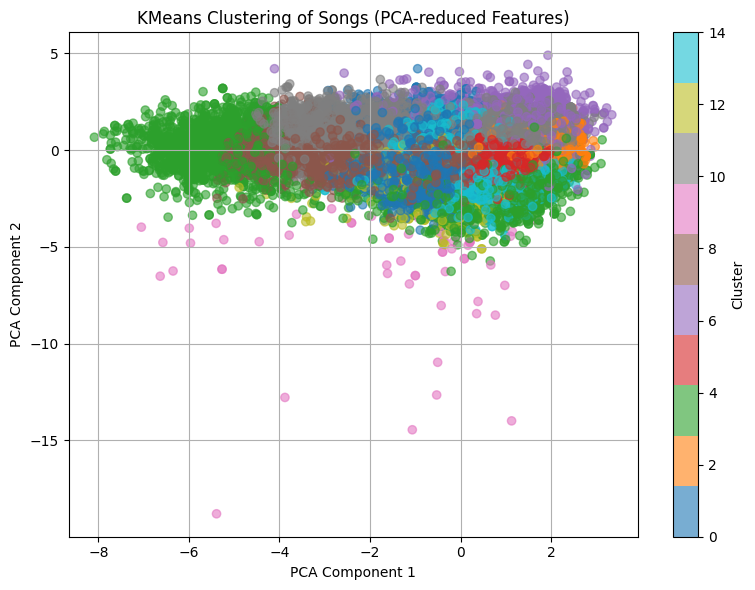

In [75]:
from sklearn.decomposition import PCA


pca =PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

# Plot the 2D PCA scatter plot with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred, cmap='tab10', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering of Songs (PCA-reduced Features)")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


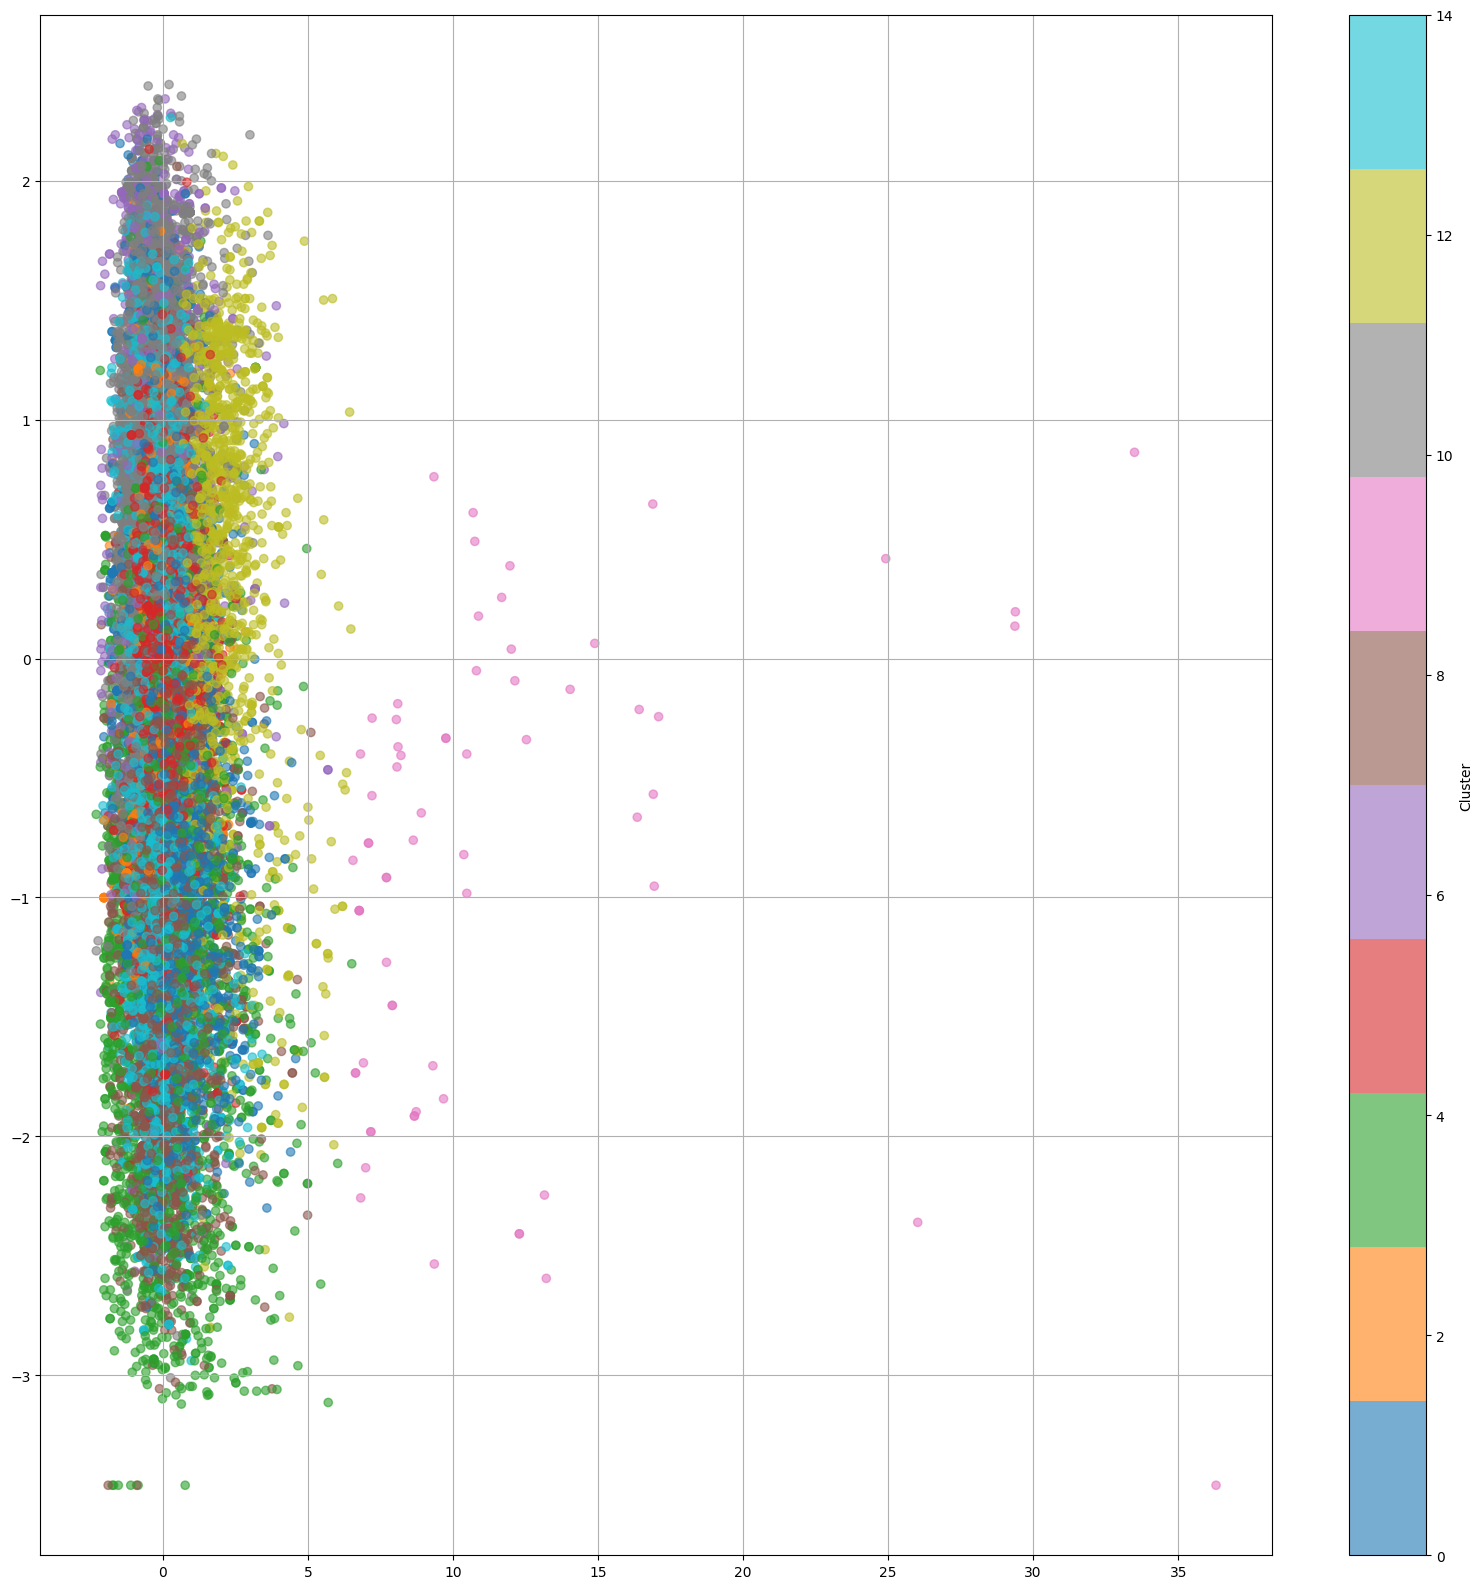

In [73]:

# Scatter plot using the first two standardized features
plt.figure(figsize=(16, 16))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred, cmap='tab10', alpha=0.6)
#plt.xlabel("Standardized Feature 1 (e.g., Danceability)")
#plt.ylabel("Standardized Feature 2 (e.g., Energy)")
#plt.title("KMeans Clustering of Songs (15 Clusters)")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
# ward linkage tends to produce relatively equally sized clusters
from sklearn import cluster


agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 500x500 with 0 Axes>

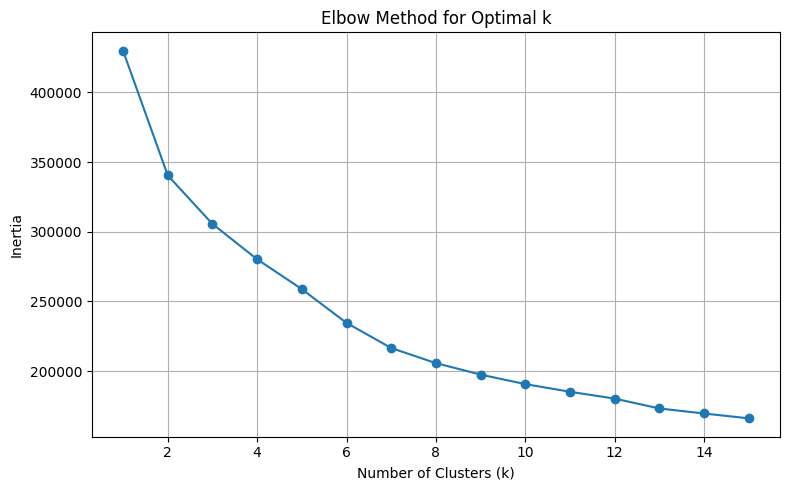

In [74]:
inertia = []

k_range = range(1, 16)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
df_cleaned["cluster"] = kmeans.fit_predict(X_scaled)

In [55]:
df_cleaned

,track_id,artists,album_name,track_name,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mmss,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,03:50,2
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,02:29,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,03:30,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,03:21,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,03:18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,06:24,0
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,06:25,0
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,04:31,0
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,04:43,1


In [61]:
from sklearn.metrics import silhouette_score
import pickle
import os

# Define the directory name or path
directory_name = "pickles"

# Create the directory
os.makedirs(directory_name, exist_ok=True)

print(f"Directory '{directory_name}' created successfully.")

cluster_range= range(5, 25)
silhouette_scores= []


for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 5)
    cluster_labels = kmeans.fit_predict(X_scaled)
    #pickling
    filename = "pickles/kmeans_" + str(n_clusters) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)




Directory 'pickles' created successfully.


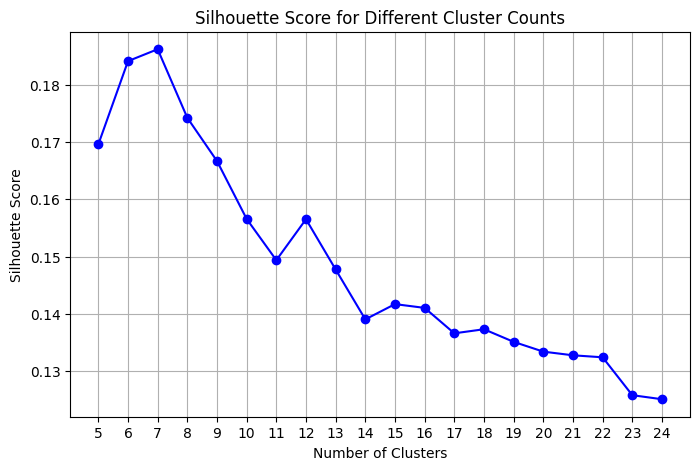

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [64]:
def load(filename = "filename.pickle"): 
    try: 
        with open("pickles/"+filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [68]:
kmeans12 = load("kmeans_12.pickle")
kmeans15 = load("kmeans_15.pickle")

In [66]:
kmeans12.predict(X_scaled)

array([5, 7, 7, ..., 2, 3, 2], shape=(42999,), dtype=int32)

In [69]:
kmeans15.predict(X_scaled)

array([ 5, 14, 14, ...,  6, 12,  6], shape=(42999,), dtype=int32)